In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition, preprocessing

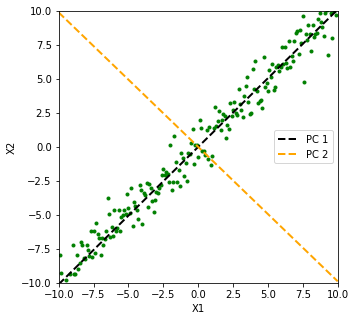

In [199]:
num_samples = 200
X = np.zeros((num_samples, 2))
X[:,0] = np.arange(-10, 10, 20/num_samples)
X[:,1] = X[:,0] + np.random.randn(num_samples)
U, D, Vt = np.linalg.svd(X)
slope_pc1 = Vt.T[:,0][1]/Vt.T[:,0][0]
slope_pc2 = Vt.T[:,1][1]/Vt.T[:,1][0]
xticks = np.linspace(-10, 10, num=41)
pc1 = xticks*slope_pc1
pc2= xticks*slope_pc2
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
_ = ax.scatter(X[:,0], X[:,1], color='green', marker='.')
_ = ax.plot(xticks, pc1, '--', lw=2, color='black', label='PC 1')
_ = ax.plot(xticks, pc2, '--', lw=2, color='orange', label='PC 2')
_ = ax.set_xlabel('X1')
_ = ax.set_ylabel('X2')
_ = ax.set_xlim((-10, 10))
_ = ax.set_ylim((-10, 10))
_  = plt.legend(loc='best')
fig.savefig('Toy PC.png', bbox_inches='tight')

In [58]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_scaled = preprocessing.scale(X)

In [59]:
pca = decomposition.PCA()
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)

In [61]:
set_1 = X_projected[y == 0,:]
set_2 = X_projected[y == 1,:]
set_3 = X_projected[y == 2,:]

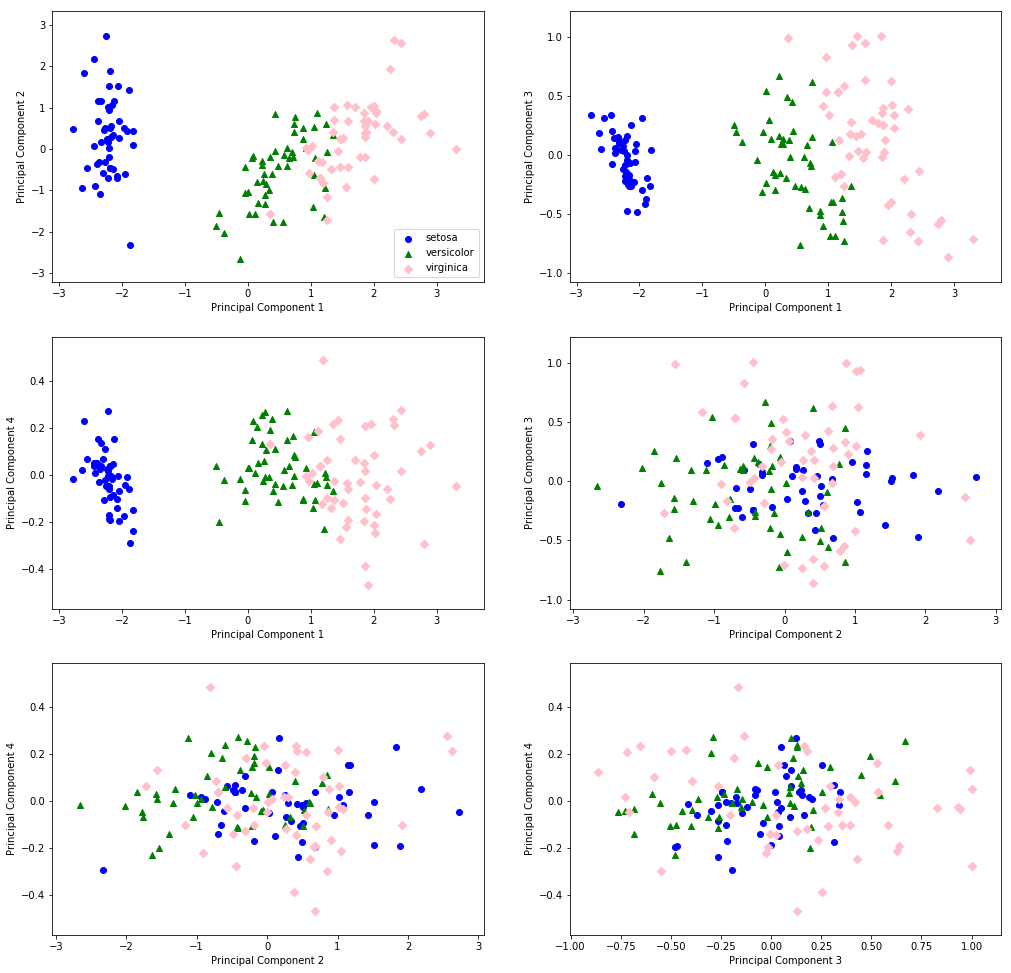

In [197]:
fig, ax = plt.subplots(nrows=3, ncols=2)
plt_count = 0
for i in range(4):
    for j in range(i+1,4):
        row = plt_count // 2
        col = (plt_count % 2) % 2
        ax[row, col].scatter(x=set_1[:,i], y=set_1[:,j], marker='o', color='blue', label='setosa')
        ax[row, col].scatter(x=set_2[:,i], y=set_2[:,j], marker='^', color='green', label='versicolor')
        ax[row, col].scatter(x=set_3[:,i], y=set_3[:,j], marker='D', color='pink', label='virginica')
        ax[row, col].set_xlabel('Principal Component {}'.format(i+1))
        ax[row, col].set_ylabel('Principal Component {}'.format(j+1))
        if (row == 0) and (col == 0):
            ax[row, col].legend(loc='best')
        plt_count += 1
fig.set_size_inches(17, 17)
fig.savefig('Iris PC.png')

#### References:
1. Section 3.4.1, "The Elements of Statistical Learning" by Trevor Hastie, Rob Tibshirani, and Jerome Friedman, [Legal copy available here](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)
2. "Computing and visualizing PCA in R" by Thiago G. Martins, [Link to blogpost](https://tgmstat.wordpress.com/2013/11/28/computing-and-visualizing-pca-in-r/)
3. "PCA Example with Iris Dataset", Scikit-Learn, [Link to tutorial](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py)